# Extract faces based on the results of the object detection

Declare constants and import modules

In [1]:
# Storage configuration
DATA_PATH = "data"
PICKLE_PATH = f"{DATA_PATH}/pickle"
PICKLE_FILE_IN = f"{PICKLE_PATH}/detections.pkl"
PICKLE_FILE_OUT = f"{PICKLE_PATH}/faces.pkl"
CLASSIFIER_PATH = "/home/xilinx/opencv/data/haarcascades/haarcascade_frontalface_default.xml"

# From https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters
SCALE_FACTOR = 1.05
MIN_NEIGHBORS = 5

In [2]:
import array
import cv2
import os
import pickle
from PIL import Image

Load image and boxes from the previous notebook.

600 x 450 px.


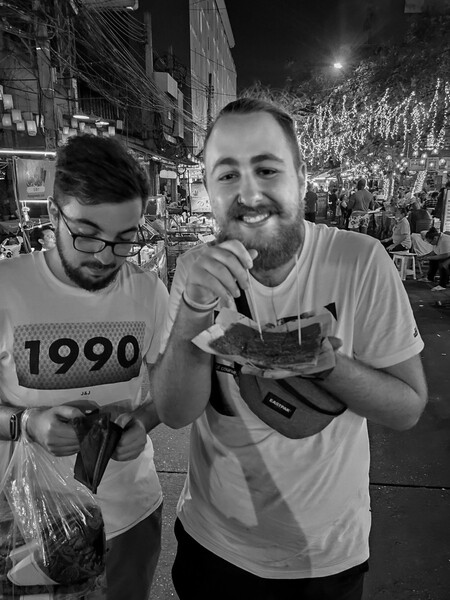

In [3]:
data = {}
try:
    with open(PICKLE_FILE_IN, "rb") as f:
        data = pickle.load(f)
except FileNotFoundError:
    print("The object detection must be run first.")
        
img = cv2.cvtColor(data["image"], cv2.COLOR_RGB2GRAY)
W, H = img.shape

print(f"{W} x {H} px.")
Image.fromarray(img)

Extract faces from the image.

* If boxes were extracted with `yolov2`, the box contains the whole body.

There used to be an option for a fallback object detector, but it was removed when completing the `yolov2` implementation.

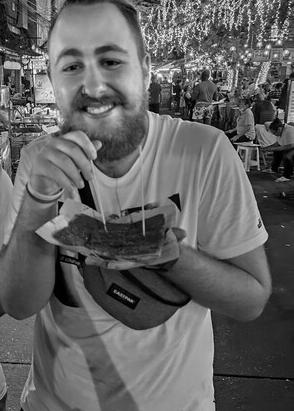

In [4]:
faces = []

if data["method"] == "yolov2":
    for coord in data["coords"]:
        x, y, w, h = coord
        faces.append(img[y:y+h, x:x+w])
else:
    print(f"Please ensure {PICKLE_FILE_IN} was created during one of the detection notebooks.")

Image.fromarray(faces[0])

Extract the faces from the picture with a cascade classifier.

Discarded box: [24 89 46 46]
Accepted box: [ 34  15 121 121]


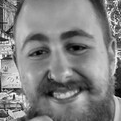

In [5]:
classifier = cv2.CascadeClassifier(CLASSIFIER_PATH)

crops = []

for face in faces:
    boxes = classifier.detectMultiScale(face, SCALE_FACTOR, MIN_NEIGHBORS)
    for box in boxes:
        x, y, w, h = box
        # discard very small results
        if w < 28*2 or h < 28*2:
            print(f"Discarded box: {box}")
        else:
            print(f"Accepted box: {box}")
            crops.append(face[y:y+h, x:x+w])
Image.fromarray(crops[0])

Store cropped images.

In [6]:
with open(PICKLE_FILE_OUT, "wb") as f:
    pickle.dump(crops, f)

Next: `3.Facial recognition`